In [1]:
import cv2
import numpy as np
from basisklassen_cam import Camera
import matplotlib.pyplot as plt

In [2]:
cam = Camera(colorspace="rgb")

In [3]:
img = cam.get_frame()

In [4]:
img.shape

(480, 640, 3)

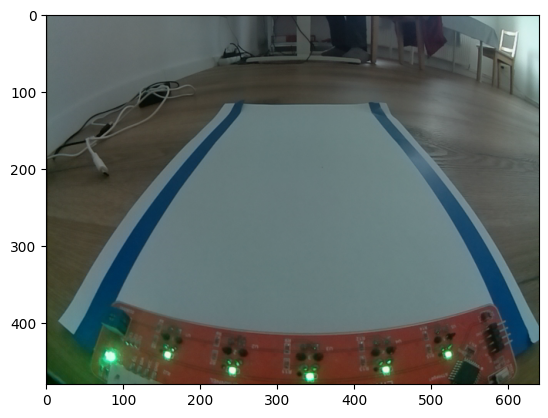

In [5]:
plt.imshow(img)

In [6]:
img_small = cv2.resize(img, None, fx=0.25, fy=0.25)

In [7]:
img_small.shape

(120, 160, 3)

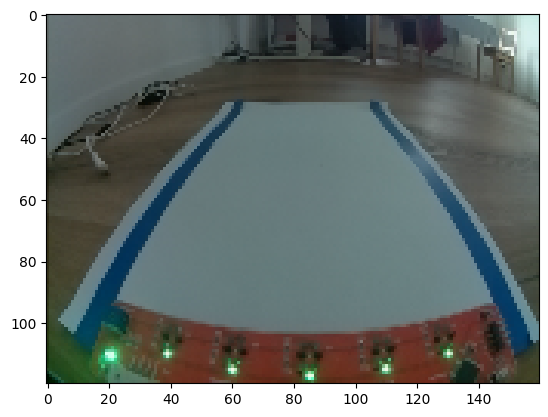

In [8]:
plt.imshow(img_small)

In [9]:
img_cropped = img_small[50:90, :, :]

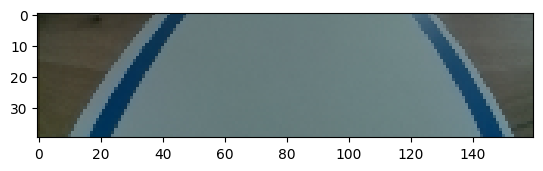

In [10]:
plt.imshow(img_cropped)

In [11]:
img_hsv = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2HSV)

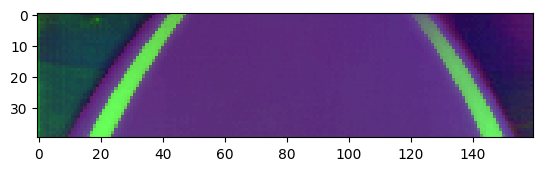

In [12]:
plt.imshow(img_hsv)

In [13]:
img_hsv

array([[[ 35,  78,  36],
        [ 44,  71,  47],
        [ 44,  71,  47],
        ...,
        [ 81,  18, 101],
        [ 79,  21,  97],
        [ 79,  21,  96]],

       [[ 35,  94,  30],
        [ 38,  81,  38],
        [ 38,  73,  42],
        ...,
        [ 78,  25, 104],
        [ 78,  25, 103],
        [ 78,  25, 102]],

       [[ 32, 104,  32],
        [ 35,  68,  45],
        [ 32,  77,  43],
        ...,
        [ 83,  19, 107],
        [ 78,  24, 108],
        [ 81,  24, 107]],

       ...,

       [[ 28, 146,  49],
        [ 29, 100,  66],
        [ 30,  88,  67],
        ...,
        [ 46,  37,  75],
        [ 46,  44,  76],
        [ 44,  44,  75]],

       [[ 30, 120,  53],
        [ 33,  94,  65],
        [ 31,  93,  66],
        ...,
        [ 44,  37,  75],
        [ 46,  37,  75],
        [ 44,  43,  77]],

       [[ 31, 127,  52],
        [ 35,  92,  72],
        [ 35,  92,  72],
        ...,
        [ 51,  35,  73],
        [ 49,  40,  71],
        [ 46,  39,  72]]

In [14]:
lower_blue = np.array([90, 60, 60])
upper_blue = np.array([130, 255, 255])

In [15]:
img_filtered = cv2.inRange(img_hsv, lower_blue, upper_blue)

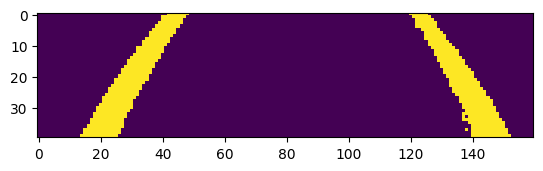

In [16]:
plt.imshow(img_filtered)

In [17]:
img_median_blur = cv2.medianBlur(img_filtered, 7)

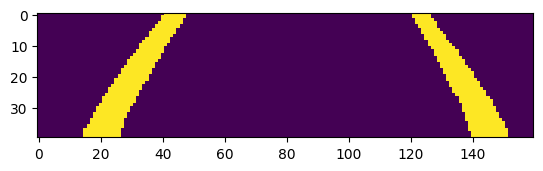

In [18]:
plt.imshow(img_median_blur)

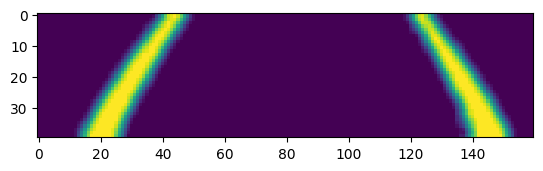

In [19]:
img_blur = cv2.blur(img_filtered, (5, 5))
plt.imshow(img_blur)

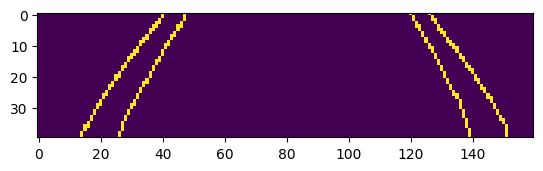

In [20]:
img_edges = cv2.Canny(img_median_blur, 900, 1000)
plt.imshow(img_edges)

In [21]:
lines = cv2.HoughLinesP(img_median_blur, 1, np.pi/180, threshold=20, minLineLength=20, maxLineGap=5)

In [22]:
print(len(lines))


15


In [23]:
line_img = img_cropped.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 1)

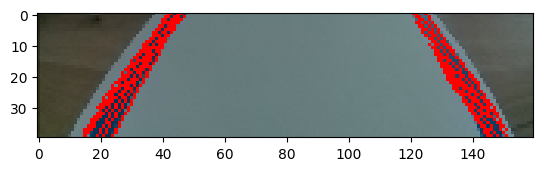

In [24]:
plt.imshow(line_img)

In [25]:
cam.release()

Zu beachten:

- Nur eine Linie sichtbar
- Ursprung Links oben -> ändert die Steigung
- WarpPerspective
- putText 